In [1]:
!pip install simpy 

In [2]:
import simpy
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [3]:
class Simulator(object):
    def __init__(self, env1):
        self.env = env1
        self.matrix  = np.empty(shape=(501, 501))
        # pixel value 255 = white
        self.matrix.fill(255)
        self.matrix[250][250] = 0
        self.count = 0
        
    def aggregation(self, r, c ):
        flag = True
        i = r
        j = c
        while(flag):
            side = ['left', 'right', 'top', 'bottom']
            sideSelected = np.random.choice(side, 1, p=[0.25, 0.25, 0.25, 0.25])[0]
            if sideSelected == "left":
                column = j-1
                row = i
            elif sideSelected == "right":
                column = j+1
                row = i
            elif sideSelected == "top":
                column = j
                row = i-1
            else:
                column = j
                row = i+1
            if row == -1:
                row = 500
            elif row == 501: 
                row = 0
            if column == -1:
                column = 500
            elif column == 501:
                column = 0
            if 0 <= column <= 500 and 0 <= row <= 500 and self.matrix[row][column] == 0:
                flag = False
            elif 0 <= column <= 500 and 0 <= row <= 500 and self.matrix[row][column] != 0: 
                self.matrix[i][j] = 255
                self.matrix[row][column] = 0
                i = row
                j = column
                self.count += 1
            
            
    def pixelSelection(self):
        side = ['left', 'right', 'top', 'bottom']
        sideSelected = np.random.choice(side, 1, p=[0.25, 0.25, 0.25, 0.25])[0]
        row = -1 
        column = -1
        remainingIndex = np.random.randint(0,500) 
        if sideSelected == "left":
            column = 0
            row = remainingIndex
        elif sideSelected == "right":
            column = 500
            row = remainingIndex
        elif sideSelected == "top":
            column = remainingIndex
            row = 0
        else:
            column = remainingIndex
            row = 500
        return row, column
    
    def diffusion(self, tick):
        while True:
            row, column = self.pixelSelection()
            self.matrix[row][column] = 0
            self.aggregation(row, column)
            print(row, column, self.env.now)
#             print("count ", self.count )
            yield self.env.timeout(tick)
    
    def printMatrix(self):
        print ("Matrix: ", self.matrix)
        fig = plt.figure(figsize=(6, 12))

        ax = fig.add_subplot(111)
        ax.set_title('colorMap')
        plt.imshow(self.matrix)
        ax.set_aspect('equal')

        cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
        cax.get_xaxis().set_visible(False)
        cax.get_yaxis().set_visible(False)
        cax.patch.set_alpha(0)
        cax.set_frame_on(False)
        plt.colorbar(orientation='vertical')
        plt.show()
#         img = Image.fromarray(self.matrix, 'L')
#         img.show()

envObject = simpy.Environment()

In [4]:
obj = Simulator(envObject)
obj.env.process(obj.diffusion(1))

<Process(diffusion) object at 0x7f831b1e28b0>

In [5]:
N = 50000
obj.env.run(until=N)


279 0 0
300 500 1
406 0 2
500 156 3
62 0 4
202 500 5
0 191 6
0 19 7
372 500 8
500 77 9
0 103 10
472 500 11
151 0 12
12 0 13
107 500 14
46 500 15
0 174 16
0 481 17
500 231 18
91 500 19
0 476 20
481 0 21
0 31 22
233 500 23
449 0 24
304 500 25
73 500 26
240 500 27
0 365 28
500 159 29
0 96 30
500 22 31
426 0 32
500 61 33
285 0 34
500 15 35
500 497 36
142 500 37
61 500 38
500 78 39
483 500 40
500 233 41
0 461 42
302 0 43
154 500 44
500 1 45
0 310 46
500 344 47
26 500 48
410 500 49
370 0 50
308 500 51
0 311 52
0 138 53
315 500 54
345 0 55
256 500 56
0 457 57
0 72 58
500 204 59
128 500 60
348 500 61
500 64 62
266 500 63
407 0 64
330 500 65
456 0 66
261 500 67
500 43 68
150 500 69
95 0 70
0 345 71
302 500 72
417 0 73
500 173 74
289 500 75
303 0 76
184 0 77
500 23 78
500 238 79
117 0 80
500 389 81
30 0 82
500 432 83
500 383 84
0 8 85
0 190 86
0 317 87
133 0 88
471 500 89
0 6 90
322 0 91
0 43 92
311 500 93
316 0 94
98 0 95
500 126 96
459 500 97
70 500 98
314 500 99
0 206 100
500 408 101
408 0 10

0 285 767
0 53 768
222 0 769
468 500 770
500 272 771
0 318 772
0 279 773
191 500 774
0 143 775
142 0 776
114 0 777
500 471 778
0 250 779
0 136 780
34 0 781
363 0 782
500 147 783
500 194 784
25 0 785
0 470 786
0 90 787
315 500 788
489 0 789
359 500 790
500 315 791
263 0 792
208 0 793
117 500 794
0 482 795
202 0 796
325 0 797
342 500 798
500 175 799
0 403 800
0 242 801
52 500 802
60 500 803
360 0 804
500 36 805
500 389 806
398 0 807
372 500 808
500 431 809
182 500 810
500 209 811
500 493 812
467 500 813
5 500 814
270 0 815
138 0 816
439 500 817
500 478 818
295 500 819
206 0 820
347 0 821
0 12 822
500 490 823
286 500 824
500 291 825
372 0 826
0 113 827
92 500 828
73 0 829
394 500 830
315 500 831
0 339 832
0 182 833
70 0 834
79 500 835
448 500 836
489 500 837
0 163 838
455 0 839
0 104 840
0 479 841
0 376 842
500 374 843
212 500 844
446 500 845
500 124 846
0 490 847
272 0 848
500 98 849
360 500 850
0 67 851
500 239 852
500 11 853
0 494 854
139 0 855
115 0 856
450 500 857
500 412 858
428 0 8

0 417 1478
379 0 1479
192 0 1480
0 417 1481
500 188 1482
118 0 1483
227 500 1484
0 448 1485
500 11 1486
214 500 1487
418 500 1488
77 500 1489
2 0 1490
328 0 1491
417 0 1492
0 374 1493
218 0 1494
500 120 1495
500 329 1496
101 0 1497
0 206 1498
63 0 1499
286 500 1500
122 500 1501
467 0 1502
500 37 1503
440 500 1504
85 0 1505
90 0 1506
500 127 1507
0 320 1508
100 500 1509
169 0 1510
500 263 1511
0 399 1512
435 0 1513
0 393 1514
0 92 1515
500 342 1516
0 141 1517
19 0 1518
143 500 1519
181 500 1520
209 0 1521
129 0 1522
0 137 1523
414 500 1524
500 450 1525
0 438 1526
325 500 1527
0 393 1528
0 459 1529
321 500 1530
334 500 1531
78 500 1532
5 0 1533
294 500 1534
148 0 1535
0 274 1536
500 424 1537
434 500 1538
500 35 1539
267 500 1540
253 500 1541
500 60 1542
0 119 1543
232 0 1544
0 129 1545
306 0 1546
500 341 1547
0 93 1548
500 45 1549
0 18 1550
312 500 1551
500 106 1552
77 0 1553
500 117 1554
500 199 1555
407 500 1556
0 366 1557
49 0 1558
354 0 1559
0 244 1560
52 0 1561
108 500 1562
0 36 156

193 500 2174
81 500 2175
400 0 2176
500 57 2177
0 223 2178
279 0 2179
434 500 2180
0 155 2181
233 0 2182
500 122 2183
377 0 2184
500 65 2185
480 0 2186
317 0 2187
0 423 2188
500 255 2189
0 14 2190
266 500 2191
0 86 2192
0 134 2193
0 414 2194
284 500 2195
0 365 2196
0 373 2197
0 21 2198
0 147 2199
212 0 2200
310 500 2201
0 212 2202
409 500 2203
29 0 2204
500 142 2205
0 234 2206
500 453 2207
332 500 2208
208 0 2209
0 80 2210
500 145 2211
500 162 2212
0 413 2213
238 500 2214
221 500 2215
0 243 2216
500 216 2217
0 82 2218
89 500 2219
135 0 2220
442 500 2221
500 387 2222
206 500 2223
98 500 2224
500 386 2225
317 500 2226
35 0 2227
126 0 2228
310 500 2229
489 0 2230
91 500 2231
500 252 2232
387 500 2233
13 0 2234
277 500 2235
393 0 2236
57 0 2237
375 0 2238
0 80 2239
152 0 2240
500 13 2241
0 358 2242
0 163 2243
0 333 2244
500 224 2245
0 277 2246
500 439 2247
0 160 2248
423 0 2249
500 358 2250
0 104 2251
500 170 2252
0 31 2253
0 248 2254
272 500 2255
500 243 2256
500 425 2257
158 0 2258
500 2

0 311 2869
0 316 2870
0 483 2871
459 500 2872
47 500 2873
175 0 2874
209 500 2875
500 311 2876
0 33 2877
322 500 2878
0 445 2879
247 500 2880
0 191 2881
490 500 2882
231 500 2883
0 446 2884
84 0 2885
48 0 2886
187 500 2887
500 328 2888
357 0 2889
50 0 2890
441 500 2891
211 500 2892
424 500 2893
329 0 2894
283 500 2895
304 500 2896
321 500 2897
436 500 2898
0 277 2899
129 500 2900
42 500 2901
0 294 2902
436 500 2903
2 500 2904
380 0 2905
441 0 2906
290 500 2907
298 0 2908
390 0 2909
315 0 2910
500 162 2911
434 500 2912
117 500 2913
500 458 2914
500 402 2915
0 92 2916
368 500 2917
0 83 2918
500 154 2919
0 48 2920
29 500 2921
40 500 2922
121 0 2923
70 500 2924
35 0 2925
468 0 2926
0 407 2927
500 337 2928
500 479 2929
293 500 2930
286 0 2931
0 271 2932
0 86 2933
500 76 2934
160 0 2935
0 125 2936
500 105 2937
257 0 2938
500 432 2939
0 351 2940
500 182 2941
500 307 2942
295 500 2943
40 0 2944
500 236 2945
0 448 2946
500 293 2947
500 167 2948
117 500 2949
4 0 2950
95 500 2951
0 244 2952
0 296

112 0 3566
500 92 3567
500 445 3568
500 403 3569
252 0 3570
500 423 3571
0 326 3572
500 219 3573
497 500 3574
500 345 3575
0 359 3576
494 0 3577
392 0 3578
500 346 3579
462 500 3580
500 72 3581
0 37 3582
121 500 3583
55 0 3584
193 500 3585
332 500 3586
420 0 3587
439 0 3588
201 0 3589
0 208 3590
420 500 3591
500 388 3592
0 222 3593
339 0 3594
500 36 3595
0 89 3596
393 500 3597
174 500 3598
202 500 3599
0 374 3600
0 359 3601
0 89 3602
0 228 3603
500 267 3604
106 500 3605
204 500 3606
0 352 3607
500 394 3608
0 416 3609
0 213 3610
218 500 3611
302 0 3612
491 0 3613
489 500 3614
500 186 3615
500 372 3616
0 421 3617
195 500 3618
216 0 3619
0 20 3620
500 323 3621
408 0 3622
500 281 3623
469 500 3624
424 0 3625
500 52 3626
0 366 3627
28 0 3628
0 477 3629
319 0 3630
500 411 3631
37 0 3632
500 280 3633
0 94 3634
191 0 3635
500 37 3636
350 0 3637
500 358 3638
456 0 3639
14 0 3640
500 259 3641
0 136 3642
0 213 3643
500 484 3644
69 0 3645
173 0 3646
500 410 3647
0 370 3648
0 257 3649
213 0 3650
0 

0 461 4262
0 195 4263
320 500 4264
300 0 4265
0 71 4266
354 0 4267
0 433 4268
0 469 4269
282 0 4270
0 49 4271
210 0 4272
0 294 4273
259 500 4274
285 0 4275
285 0 4276
290 500 4277
0 424 4278
27 500 4279
320 500 4280
500 260 4281
413 0 4282
0 284 4283
400 0 4284
0 416 4285
406 0 4286
0 404 4287
500 415 4288
403 500 4289
0 401 4290
217 500 4291
148 500 4292
500 319 4293
500 1 4294
249 0 4295
350 0 4296
0 212 4297
0 471 4298
421 500 4299
330 500 4300
391 0 4301
500 488 4302
0 461 4303
375 500 4304
0 483 4305
500 366 4306
228 0 4307
341 500 4308
0 445 4309
0 107 4310
179 0 4311
151 0 4312
275 500 4313
500 478 4314
500 42 4315
485 500 4316
219 0 4317
303 0 4318
500 431 4319
439 0 4320
499 0 4321
399 500 4322
138 0 4323
112 0 4324
0 440 4325
460 500 4326
283 0 4327
0 196 4328
0 474 4329
180 0 4330
151 0 4331
386 0 4332
500 175 4333
0 264 4334
390 0 4335
0 91 4336
24 500 4337
262 0 4338
500 96 4339
500 370 4340
58 500 4341
0 221 4342
500 187 4343
26 500 4344
41 0 4345
500 83 4346
3 0 4347
0 4

KeyboardInterrupt: 

Matrix:  [[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


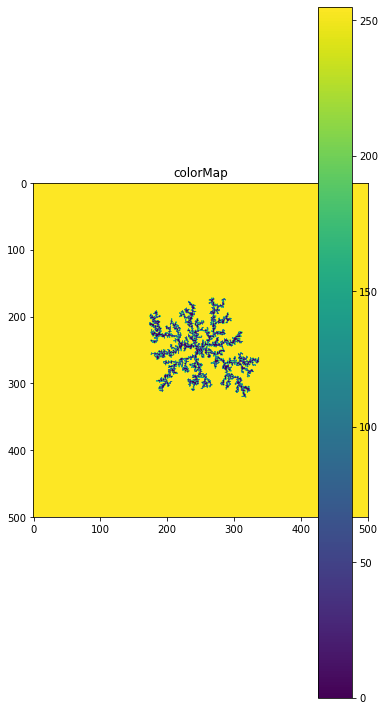

In [6]:
obj.printMatrix()

In [95]:
import numpy as np
from PIL import Image

# Creates a random image 100*100 pixels
mat  = np.empty(shape=(100, 100))
        
mat.fill(255)
mat[50][50] = 0

# Creates PIL image
img = Image.fromarray(mat, 'L')
img.show()

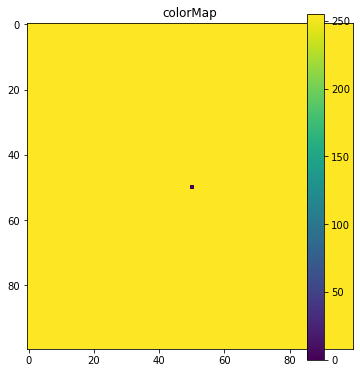

In [99]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(mat)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()